In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CSV data used is provided by the web scraping team pulled from Woolworths

In [2]:
df1 = pd.read_csv("/users/liamedmunds/Desktop/Semester 3 2024/datasets/Sun4AugWoolworths 1.csv")
df2 = pd.read_csv("/users/liamedmunds/Desktop/Semester 3 2024/datasets/Tue27AugWoolworths 1.csv")
df3 = pd.read_csv("/users/liamedmunds/Desktop/Semester 3 2024/datasets/Tue03SepWoolworths 1.csv")
df4 = pd.read_csv("/users/liamedmunds/Desktop/Semester 3 2024/datasets/Wed04SepWoolworths 1.csv")
df5 = pd.read_csv("/users/liamedmunds/Desktop/Semester 3 2024/datasets/Tue10SepWoolworths 1.csv")

In [3]:
df1['Date']="2024-08-04"
df2['Date']="2024-08-27"
df3['Date']="2024-09-03"
df4['Date']="2024-09-04"
df5['Date']="2024-09-10"

In [4]:
#merge the csv files together
woolies_merged = pd.concat([df1, df2, df3, df4, df5], axis=0)
print(woolies_merged.columns)

Index(['Product Code', 'Category', 'Item Name', 'Best Price',
       'Best Unit Price', 'Item Price', 'Unit Price', 'Price Was',
       'Special Text', 'Complex Promo Text', 'Link', 'Date'],
      dtype='object')


In [5]:
#split the data into training and testing split for further validation
train_set = pd.concat([df1, df2, df3, df4], axis=0)
test_set = pd.DataFrame(df5)

In [6]:
woolies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120222 entries, 0 to 24721
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Product Code        120222 non-null  int64 
 1   Category            120222 non-null  object
 2   Item Name           120222 non-null  object
 3   Best Price          120222 non-null  object
 4   Best Unit Price     102612 non-null  object
 5   Item Price          120222 non-null  object
 6   Unit Price          102612 non-null  object
 7   Price Was           25173 non-null   object
 8   Special Text        46019 non-null   object
 9   Complex Promo Text  13429 non-null   object
 10  Link                120222 non-null  object
 11  Date                120222 non-null  object
dtypes: int64(1), object(11)
memory usage: 11.9+ MB


In [7]:
# Function to clean web-scraped data
def clean_web_scraped_data(data, file_type):
    # Standardize column names
    data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
    
    # Remove duplicates
    data = data.drop_duplicates()
    
    # Remove rows based on category column for each file type
    if 'category' in data.columns:
        if file_type == 'Coles':
            data = data[data['category'] != "Bonus Ovenware Credits"]
        elif file_type == 'Woolworths':
            data = data[~data['category'].isin(["Electronics", "Home & Lifestyle"])]
    
    # Convert price-related columns to numeric
    for col in ['best_price', 'item_price', 'price_was', 'best_unit_price', 'unit_price']:
        if col in data.columns:
            data[col] = data[col].str.replace(r'[^\d.]', '', regex=True).astype(float)
    
    # Handle missing values
    threshold = len(data) * 0.5
    data = data.dropna(axis=1, thresh=threshold)  # Drop columns with >50% missing
    data = data.dropna()  # Drop rows with any remaining missing values
    
    return data


In [8]:
# Load and clean Woolworths dataset
cleaned_woolworths_data_dated = clean_web_scraped_data(woolies_merged, 'Woolworths')

# Save the cleaned Woolworths dataset
woolworths_output_file_path = ('/users/liamedmunds/Desktop/Woolworths_cleaned_dated.csv')
cleaned_woolworths_data_dated.to_csv(woolworths_output_file_path, index=False)
print(f"Cleaned Woolworths data saved to {woolworths_output_file_path}")

Cleaned Woolworths data saved to /users/liamedmunds/Desktop/Woolworths_cleaned_dated.csv


In [13]:
cleaned_train_split = clean_web_scraped_data(train_set, 'train_set')

train_set_output_file_path = ('/users/liamedmunds/Desktop/train_set_output.csv')
cleaned_train_split.to_csv(train_set_output_file_path, index=False)
print(f"Cleaned training set data saved to {train_set_output_file_path}")

cleaned_test_split = clean_web_scraped_data(test_set, 'test_set')

test_set_output_file_path = ('/users/liamedmunds/Desktop/test_set_output.csv')
cleaned_test_split.to_csv(test_set_output_file_path, index=False)
print(f"Cleaned testing set data saved to {test_set_output_file_path}")

/var/folders/np/9tr5_67130111p0bt8bhqmz40000gn/T/ipykernel_74580/163054715.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace(r'[^\d.]', '', regex=True).astype(float)
/var/folders/np/9tr5_67130111p0bt8bhqmz40000gn/T/ipykernel_74580/163054715.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace(r'[^\d.]', '', regex=True).astype(float)
/var/folders/np/9tr5_67130111p0bt8bhqmz40000gn/T/ipykernel_74580/163054715.py:19: SettingWithCopyWarning: 

Cleaned training set data saved to /users/liamedmunds/Desktop/train_set_output.csv
Cleaned testing set data saved to /users/liamedmunds/Desktop/test_set_output.csv


In [15]:
print(cleaned_train_split.info())
print(cleaned_test_split.info())

<class 'pandas.core.frame.DataFrame'>
Index: 81403 entries, 0 to 24777
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_code     81403 non-null  int64  
 1   category         81403 non-null  object 
 2   item_name        81403 non-null  object 
 3   best_price       81403 non-null  float64
 4   best_unit_price  81403 non-null  float64
 5   item_price       81403 non-null  float64
 6   unit_price       81403 non-null  float64
 7   link             81403 non-null  object 
 8   date             81403 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 21145 entries, 0 to 24720
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_code     21145 non-null  int64  
 1   category         21145 non-null  object 
 2   item_name        21145 non-null 

In [16]:
cleaned_woolworths_data_dated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98770 entries, 0 to 24720
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_code     98770 non-null  int64  
 1   category         98770 non-null  object 
 2   item_name        98770 non-null  object 
 3   best_price       98770 non-null  float64
 4   best_unit_price  98770 non-null  float64
 5   item_price       98770 non-null  float64
 6   unit_price       98770 non-null  float64
 7   link             98770 non-null  object 
 8   date             98770 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.5+ MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Best Price Distribution')

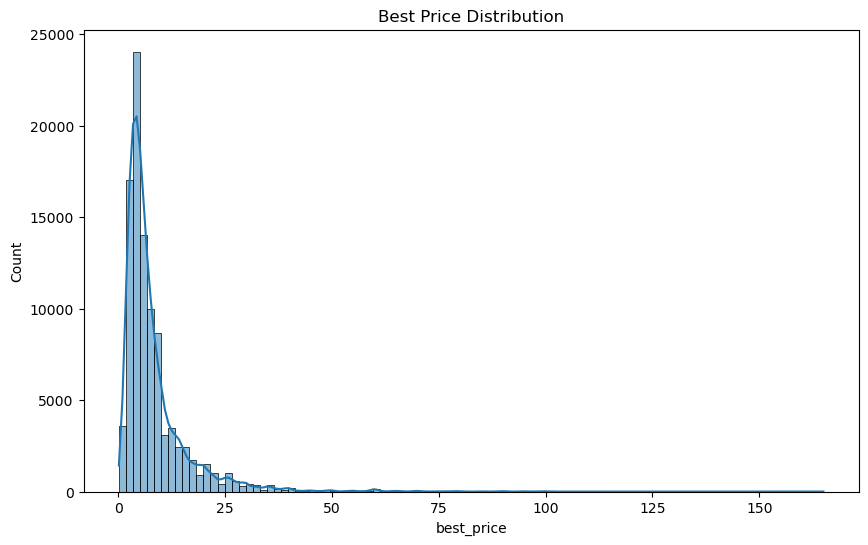

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(cleaned_woolworths_data_dated['best_price'], bins=100, kde=True)
plt.title("Best Price Distribution")

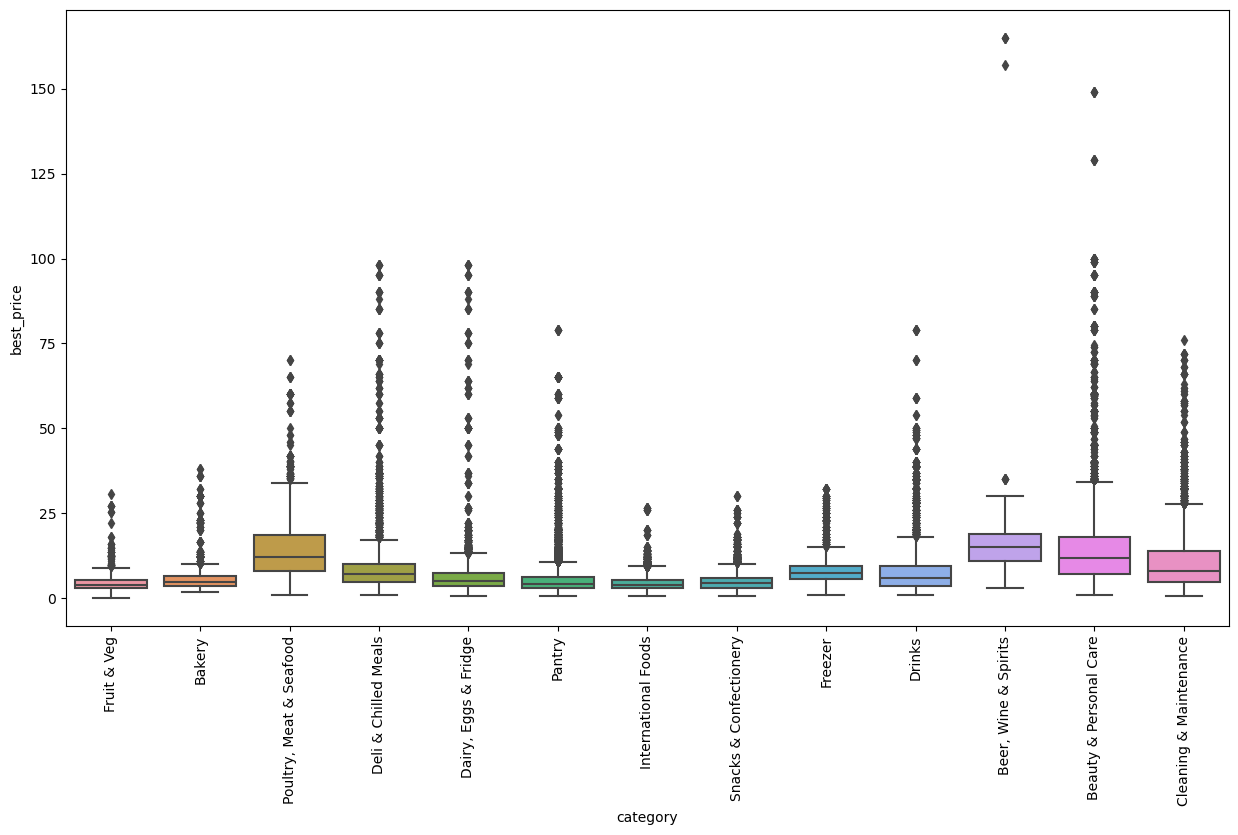

In [18]:
#boxplot of best prices by category
plt.figure(figsize=(15, 8))
sns.boxplot(x='category', y='best_price', data=cleaned_woolworths_data_dated)
plt.xticks(rotation=90)
plt.show()

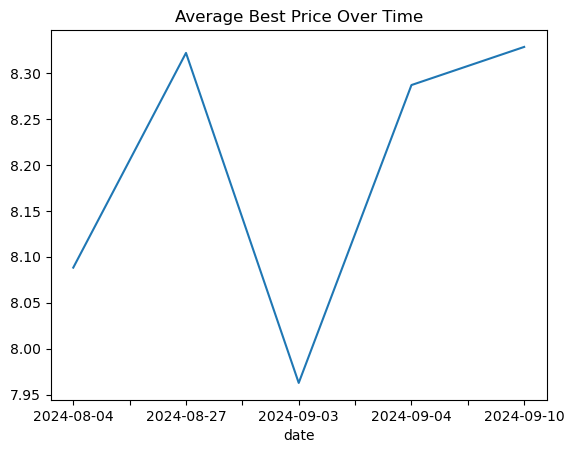

In [19]:
cleaned_woolworths_data_dated.groupby('date')['best_price'].mean().plot()
plt.title('Average Best Price Over Time')
plt.show()

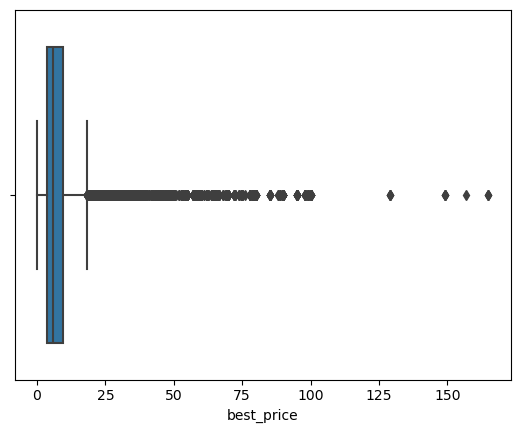

In [20]:
sns.boxplot(x=cleaned_woolworths_data_dated['best_price'])
plt.show()

In [38]:
#log normalisation of best price
cleaned_woolworths_data_dated['log normalised'] = np.log(cleaned_woolworths_data_dated[['best_price']])
cleaned_woolworths_data_dated.head()

,product_code,category,item_name,best_price,best_unit_price,item_price,unit_price,link,date,log normalised,yeojohnson_transformed
0,133211,Fruit & Veg,Cavendish Bananas Each,0.77,0.771,0.77,0.771,https://www.woolworths.com.au/shop/productdeta...,2024-08-04,-0.261365,-2.861572
1,134034,Fruit & Veg,Fresh Tomato Each,0.65,0.651,0.65,0.651,https://www.woolworths.com.au/shop/productdeta...,2024-08-04,-0.430783,-3.051162
2,144607,Fruit & Veg,Strawberries 250g Punnet,4.00,16.001,4.00,16.001,https://www.woolworths.com.au/shop/productdeta...,2024-08-04,1.386294,-0.539917
3,105919,Fruit & Veg,Fresh Pink Lady Apples Each,0.86,0.861,0.86,0.861,https://www.woolworths.com.au/shop/productdeta...,2024-08-04,-0.150823,-2.730419
4,169438,Fruit & Veg,Truss Tomatoes Each,0.83,0.831,0.83,0.831,https://www.woolworths.com.au/shop/productdeta...,2024-08-04,-0.186330,-2.773167


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


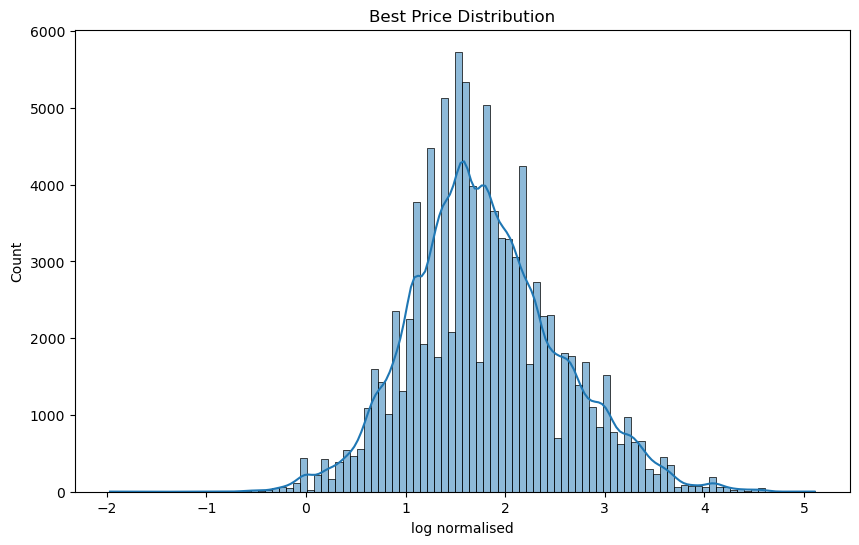

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(cleaned_woolworths_data_dated['log normalised'], bins=100, kde=True)
plt.title("Best Price Distribution")
plt.show()

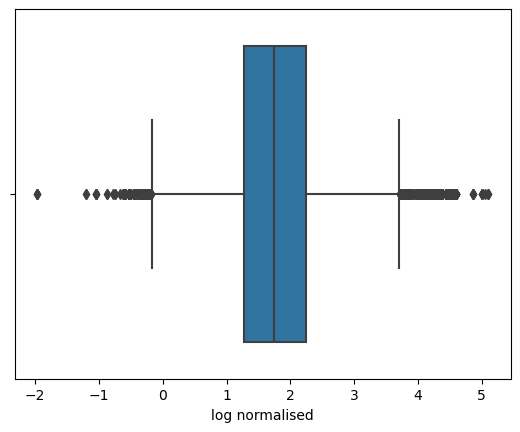

In [23]:
sns.boxplot(x=cleaned_woolworths_data_dated['log normalised'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


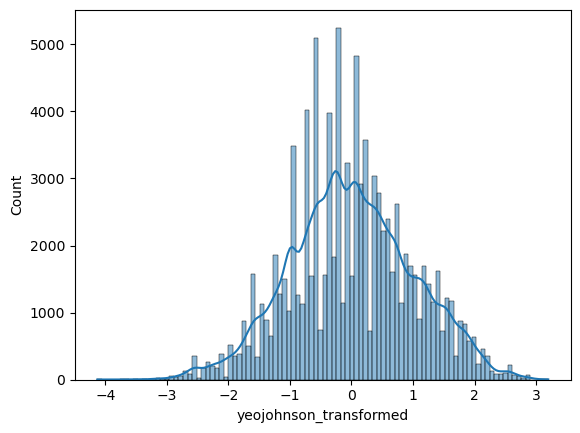

In [24]:
#yeo-johnson normalisation of best price
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
cleaned_woolworths_data_dated['yeojohnson_transformed'] = pt.fit_transform(cleaned_woolworths_data_dated[['best_price']])

sns.histplot(cleaned_woolworths_data_dated['yeojohnson_transformed'], bins=100, kde=True)
plt.show()

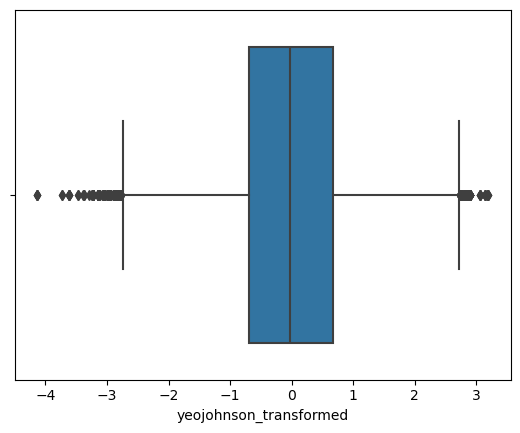

In [25]:
sns.boxplot(x=cleaned_woolworths_data_dated['yeojohnson_transformed'])
plt.show()

# Split and train data

In [26]:
#determining target variable
y = cleaned_woolworths_data_dated['best_price']
X = cleaned_woolworths_data_dated[['product_code', 'best_unit_price', 'item_price', 'unit_price']]

from sklearn.model_selection import train_test_split

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
classifier = RandomForestRegressor()
model = classifier.fit(X_train, y_train)


In [29]:
#train and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.0003397387870840013
Mean Squared Error (MSE): 0.0002378808312240503
R² Score: 0.9999961597067352


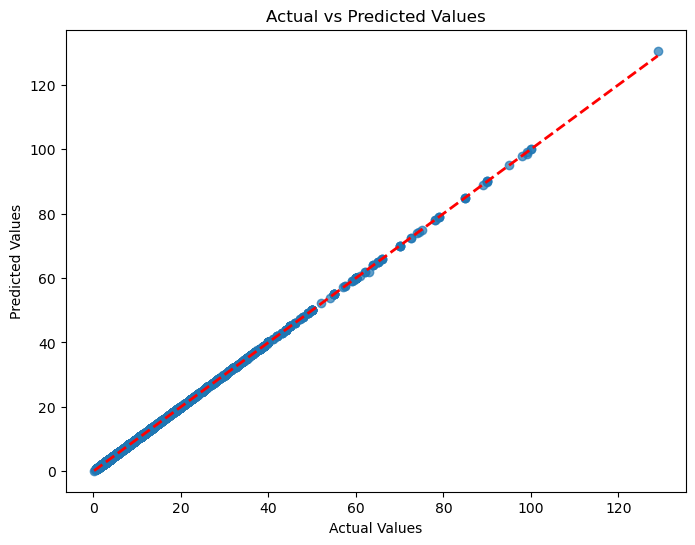

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Below is using the training data and test data specifically divided to use for further validation

In [31]:
X_train = train_set[['product_code', 'best_unit_price', 'item_price', 'unit_price']]
y_train = train_set['best_price']
X_test = test_set[['product_code', 'best_unit_price', 'item_price', 'unit_price']]
y_test = test_set['best_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
classifier = RandomForestRegressor()
model = classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.00046643583201998873
Mean Squared Error (MSE): 0.00043796726562183425
R² Score: 0.9999931805733785


Below is the model using the log normalised data for best price

Mean Absolute Error (MAE): 1.4060173962022631e-05
Mean Squared Error (MSE): 2.418533230962001e-07
R² Score: 0.9999995577913365


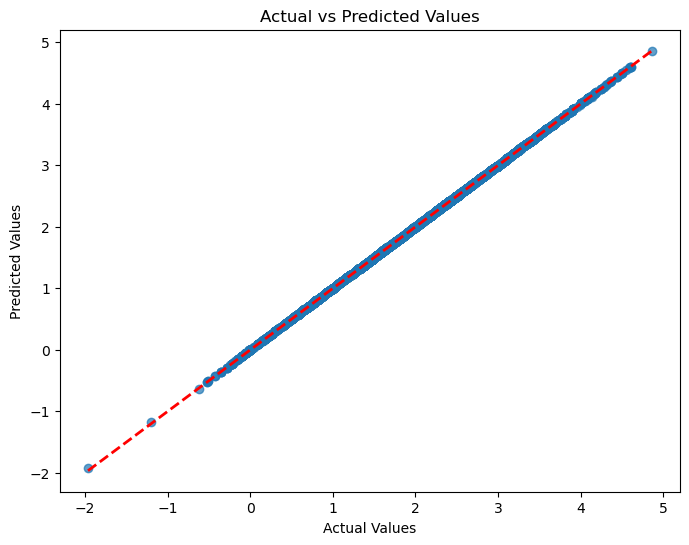

In [40]:
y = cleaned_woolworths_data_dated['log normalised']
X = cleaned_woolworths_data_dated[['product_code', 'best_unit_price', 'item_price', 'unit_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
classifier = RandomForestRegressor()
model = classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Below is the model using yeojohnson normalisation

Mean Absolute Error (MAE): 1.2715309289353138e-05
Mean Squared Error (MSE): 1.2652002303422138e-07
R² Score: 0.9999998708306866


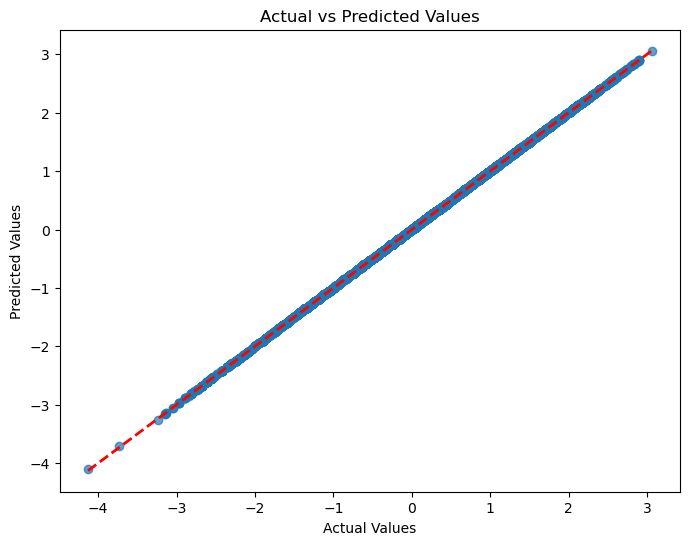

In [41]:
y = cleaned_woolworths_data_dated['yeojohnson_transformed']
X = cleaned_woolworths_data_dated[['product_code', 'best_unit_price', 'item_price', 'unit_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
classifier = RandomForestRegressor()
model = classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

It can be seen that there is exceptionally high evaluation metrics. Meaning that the model is overfitting to the data. Further experimentation may be useful however tests done up till now have yielded no significant changes. It is likely that more data is needed to find variation in prices as 5 weeks is certainly not a good representation. Synthetic data is also another possibility in developing a solid model.